**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

# Proyecto 8: Plan ideal para usuarios de Megaline

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Objetivo](#objetivo)
* [Análisis exploratorio](#analisis_expl)
* [Importación de librerías](#imp_lib)
* [Importación de datasets](#imp_data)
* [Análisis de la tabla users_behavior](#'analisis_ub')
* [Valores duplicados dela tabla users_behavior](#'dup_values_ub')
* [Modelo: Regresión Logística](#'reg_log')
    * [Características a trabajar con la Regresión Logística](#'caract_reg_log')
    * [División de datos con regresion logistica](#'div_reg_log')
    * [Reduccion de componentes](#'red_reg_log')
    * [Entrenamiento del modelo](#'train_model_reg_log')
    * [Evaluación del modelo](#'eval_model_reg_log')
    * [Visualización de la frontera de decisión](#'front_model_reg_log')
    * [Métricas para evaluacion de modelo](#'met_reg_log')
    * [F1-Score ](#'f1_reg_log')
    * [Curva ROC y AUC](#'curves_reg_log)
* [Modelo: Arbol de decision](#'decision_tree')
    * [Características a trabajar con Arbol de Decision](#'caract_tree_dec')
    * [División de datos con arbol de decisión](#'div_tree_dec')
    * [Preprocesador](#'prep_tree_dec')
    * [Pipeline](#'pipe_tree_dec')
    * [Hiperparámetros](#'hip_tree_dec')
    * [GridSearchCV con el conjunto de validacion](#'grids_tree_dec')
    * [Mejor config del modelo](#'bestm_tree_dec')
    * [Calibracion con el conjunto de validación](#'calib_tree_dec')
    * [Predicciones y probabilidades](#'pred_prob_tree_dec')
    * [Metricas con el conjunto de prueba](#'mets_tree_dec')
    * [Curva ROC y AUC](#'curve_roc_auc_tree_dec')
* [Conclusion](#'conclusion')


# Introducción <a id='intro'></a>

La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

# Objetivo <a id='objetivo'></a>


El objetivo de este análisis es determinar en cuanto a la exactitud del modelo elegido, el mejor plan para nuestros clientes. 

# Análisis exploratorio <a id='analisis_expl'></a>

En el siguiente apartado se observarán a detalle los datos con los que se está trabajando. Bajo las siguiente situaciones se realizarán cambios:

-Datos nulos

-Filas repetidas.

-Datos que impidan realizar el análisis por el formato en el que vienen.

## Importación de librerías<a id='imp_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt


## Importación de datasets<a id='imp_data'></a>

In [2]:
users_behavior = pd.read_csv("C://Users//aylin//OneDrive//Documentos//users_behavior.csv")


## Análisis de la tabla users_behavior<a id='analisis_ub'></a>

In [3]:
users_behavior.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
users_behavior.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [5]:
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo! Has utilizado métodos como _info()_, _head()_ o _describe()_ para analizar los datos. Estos métodos te permiten entender la estructura de los datos, los tipos de variables, la presencia de valores faltantes y obtener una descripción estadística general.

</div>

<span style='color:green'> No hay valores ausentes, y considero que el tipo de datos es correcto ya que debido al contenido en cada columna por sus decimales en cuando a las columnas tipo 'float64' están bien y en el caso de la columna 'is_ultra' solo ocupa 2 números y son enteros así que no hay problema.  </span>

### Valores duplicados dela tabla users_behavior<a id='dup_values_ub'></a>

In [6]:
users_behavior.duplicated().sum()

np.int64(0)

<span style='color:green'> Se observa que no hay valores duplicados y se puede continuar.  </span>

[Volver a Contenidos](#back)

## Modelo: Regresión Logística<a id='reg_log'></a>

### Características a trabajar con la Regresión Logística <a id='caract_reg_log'></a>

In [7]:
df_log = users_behavior
x = df_log[['calls','minutes','messages','mb_used']]
y = df_log ['is_ultra']

<span style='color:green'> Elegí almacenar en 'x' las características y en 'y' nuestr objetivo </span>

### División de datos con regresion logistica <a id='div_reg_log'></a>

In [8]:
#Division de datos del 60% para el conjunto de train
x_train,x_val,y_train, y_val = train_test_split(x, y , test_size= 0.4, random_state= 98765)

In [9]:
#Division de datos de 20% para el conjunto de validacion y 20% para el conjunto de test
x_valid,x_test,y_valid,y_test = train_test_split(x_val,y_val, test_size = 0.5, random_state= 98765)

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has dividido correctamente los datos en tres conjuntos: _train_, _validation_ y _test_. Dividir los datos de esta forma permite entrenar el modelo en un conjunto, validar su desempeño en otro y finalmente evaluarlo en un conjunto independiente para obtener una medida precisa de su rendimiento.

Has utilizado correctamente _train_test_split_ dos veces para dividir los datos en tres conjuntos (entrenamiento, validación y prueba). Este método es el más común para dividir los datos de manera aleatoria, asegurando que cada conjunto tenga una representación justa.

    
</div>

### Reduccion de componentes <a id='red_reg_log'></a>

In [10]:
pca =PCA (n_components=2)
x_train_pca = pca.fit_transform(x_train)

In [11]:
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

<span style='color:green'> Opté por utilizar esta técnica de reducción de dimensionalidad para poder utilizar mi conjunto de datos con la mayor cantidad de info original. Por favor si había otro camino para hacerlo me gustaría saberlo. Gracias!  </span>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No es necesario aplicar PCA en este caso, ya que el conjunto de datos no tiene muchas columnas. De hecho, usar PCA podría resultar problemático, ya que implicaría pérdida de información. Además, la reducción lineal de dimensionalidad que realiza PCA podría no ser adecuada para este conjunto de datos en particular.

</div>

[Volver a Contenidos](#back)

### Entrenamiento del modelo <a id='train_model_reg_log'></a>

In [12]:
model_reg = LogisticRegression(solver='liblinear')
model_reg.fit(x_train_pca, y_train)


LogisticRegression(solver='liblinear')

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien! Has entrenado el modelo únicamente con el conjunto de entrenamiento, lo que es exactamente lo que se debe hacer. Este conjunto contiene los datos con los que el modelo aprende los patrones, y no debe utilizar otros conjuntos durante el entrenamiento.

</div>

<span style='color:green'> Aplicamos el modelo y lo entrenamos con Regresión logística </span>

### Evaluación del modelo <a id='eval_model_reg_log'></a>

In [13]:
y_valid_pred = model_reg.predict(x_valid_pca)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Exactitud en el conjunto de validación:", accuracy_valid)

Exactitud en el conjunto de validación: 0.7153965785381027


In [14]:
y_test_pred = model_reg.predict(x_test_pca)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Exactitud en el conjunto de prueba:", accuracy_test)

Exactitud en el conjunto de prueba: 0.749611197511664


<span style='color:green'> Lamentablemente el modelo con el conjunto de validación aún le falta precisión, se acerca al número que buscamos pero incluso el modelo de prueba no es tan preciso. </span>

### Visualización de la frontera de decisión <a id='front_model_reg_log'></a>

In [15]:
x_min, x_max = x_test_pca[:, 0].min() - 0.5, x_test_pca[:, 0].max() + 0.5
y_min, y_max = x_test_pca[:, 1].min() - 0.5, x_test_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))



<span style='color:green'> Ajustamos los límites para la frontera </span>

In [16]:
Z = model_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


<span style='color:green'> Se predice la clase para cada punto. </span>

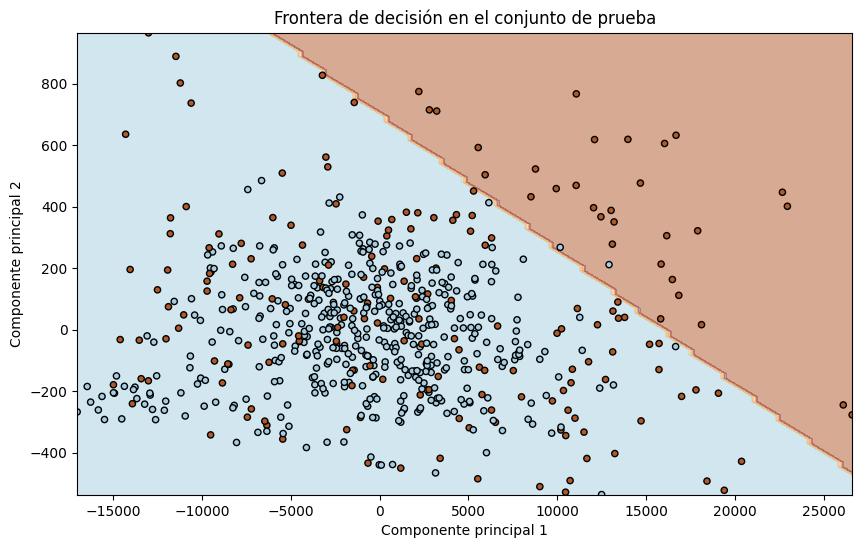

In [17]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.Paired)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Frontera de decisión en el conjunto de prueba")
plt.show()

<span style='color:green'> Se visualiza la frontera de decisión con los datos de prueba donde del lado azul estaría el plan Smart, y el lado rojo con el plan Ultra, por la cantidad de clientes se visualiza que se les puede ofrecer el plan Smart  </span>

[Volver a Contenidos](#back)

## Métricas para evaluacion de modelo <a id='met_reg_log'></a>

### F1-Score <a id='f1_reg_log'></a>

In [18]:
f1 = f1_score(y_test, y_test_pred)
print("F1-score:", f1)

F1-score: 0.27802690582959644


### Curva ROC y AUC <a id='curves_reg_log'></a>

AUC en el conjunto de prueba: 0.6616707331242012


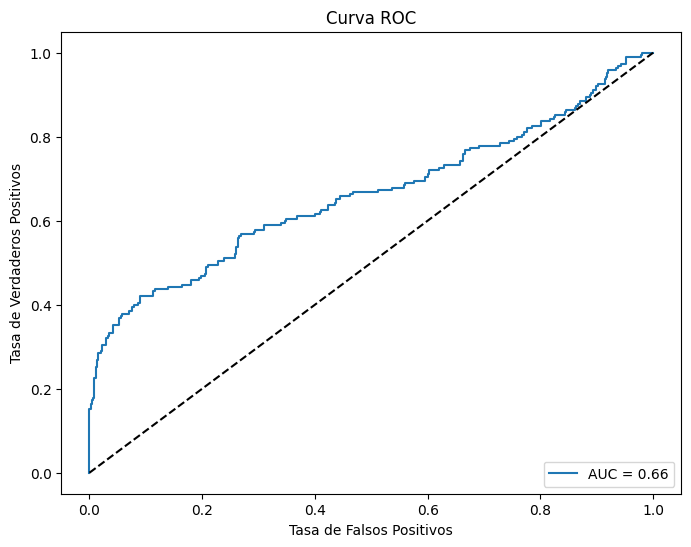

In [19]:
y_test_prob = model_reg.predict_proba(x_test_pca)[:, 1] 
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

#AUC
auc = roc_auc_score(y_test, y_test_prob)
print("AUC en el conjunto de prueba:", auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

<span style='color:green'> De acuerdo a estos 2 ultimos datos podemos visualizar en general que este tipo de modelo no es tan robusto para satisfacer nuestras necesidades para poder encaminar al cliente y asignarle un buen plan ya que por estos resultado al modelo le cuesta diferenciar y en general el modelo tiene una capacidad moderada para diferenciar las 2 clases pero aún le falta para poder ser un modelo confiable  por lo que será necesario analizarlo con otro modelo. </span>

[Volver a Contenidos](#back)

## Modelo: Arbol de decision <a id='decision_tree'></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Genial! Consideraste varios modelos para el ajuste. Probar diferentes enfoques es clave en el aprendizaje automático, ya que diferentes modelos pueden capturar patrones de forma distinta. Comparar varios modelos te asegura que encuentres el que mejor se ajusta a los datos.

</div>

### Características a trabajar con Arbol de Decision <a id='caract_tree_dec'></a>

###  <a id='caract_reg_log'></a>

In [20]:
df_tree = users_behavior
x1 = df_tree[['calls','minutes','messages','mb_used']]
y1 = df_tree ['is_ultra']

<span style='color:green'> Se eligen las características como x1 y en 'y1' nuestro objetivo </span>

### División de datos con arbol de decisión <a id='div_tree_dec'></a>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No es correcto, al comparar modelos, que se usen conjuntos distintos. La idéa es que los conjuntos de train, val y test sean los mismos para todos los modelos. 

</div>

In [21]:
#Division de datos del 60% para el conjunto de train
x1_train,x1_val,y1_train, y1_val = train_test_split(x1, y1 , test_size= 0.4, random_state= 98765)

In [22]:
#Division de datos de 20% para el conjunto de validacion y 20% para el conjunto de test
x1_valid, x1_test, y1_valid, y1_test = train_test_split(x1_val, y1_val, test_size = 0.5, random_state=98765)

### Preprocesador <a id='prep_tree_dec'></a>

In [23]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ['calls', 'minutes', 'messages', 'mb_used'])])

<span style='color:green'> Se configura un preprocesador para poder trabajar con todas nuestras caracteristicas numéricas </span>

### Pipeline <a id='pipe_tree_dec'></a>

In [24]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=98765))
])

<span style='color:green'> Este es uno de los pasos importantes ya que se crea un pipeline para poder trabajar con este modelo, y se elige el random_state= 98765 para que tengamos el conjunto de datos reproducible y sea más visible para nosotros el cambio en los modelos  </span>

[Volver a Contenidos](#back)

### Hiperparámetros <a id='hip_tree_dec'></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien hecho! Has ajustado al menos tres hiperparámetros, lo que es una excelente práctica. Ajustar los hiperparámetros permite optimizar el modelo para obtener el mejor rendimiento posible.

</div>

In [25]:
param_grid = {
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}


<span style='color:green'> Se define la cuadrícula con los hiperparámetros para ser utilizado en el siguiente paso. Se incluyen los hiperparámetros como la máxima profundidad (para evitar el sobreajuste), el mínimo de muestras para el numero, y los criterios para ser evaluados que en este caso son gini y la entropía</span>

### GridSearchCV con el conjunto de validacion <a id='grids_tree_dec'></a>

In [26]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(x1_train, y1_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\aylin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['calls',
                                                                          'minutes',
                                                                          'messages',
                                                                          'mb_used'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=98765))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 7],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

<span style='color:green'> Utilizamos GridSearch para ajustar todos los hiperparámetros que dimos en el paso anterior y lo entrenamos con el conjunto de entrenamiento. </span>

### Mejor config del modelo <a id='bestm_tree_dec'></a>

In [27]:
best_model = grid_search.best_estimator_

<span style='color:green'> Al tener los anteriores parámetros podemos hacer uso de esa propiedad para sacar los mejores hiperparámetros. </span>

### Calibracion con el conjunto de validación <a id='calib_tree_dec'></a>

In [28]:
calibrated_model = CalibratedClassifierCV(estimator=best_model, cv=5)
calibrated_model.fit(x1_valid, y1_valid)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('preprocessor',
                                                  ColumnTransformer(transformers=[('num',
                                                                                   StandardScaler(),
                                                                                   ['calls',
                                                                                    'minutes',
                                                                                    'messages',
                                                                                    'mb_used'])])),
                                                 ('clf',
                                                  DecisionTreeClassifier(criterion='entropy',
                                                                         max_depth=7,
                                                                         min_samples_split=10,
                                                                         random_state=98765))]))

<span style='color:green'> Se calibra el modelo usando el conjunto de validacion y a su vez con los datos del mejor modelo </span>

[Volver a Contenidos](#back)

### Predicciones y probabilidades <a id='pred_prob_tree_dec'></a>

In [29]:
y_pred = calibrated_model.predict(x1_test)
y_proba = calibrated_model.predict_proba(x1_test)[:, 1]

<span style='color:green'> Se calculas las predicciones y las probabilidades con el conjunto de prueba </span>

### Metricas con el conjunto de prueba <a id='mets_tree_dec'></a>

In [30]:
accuracy1 = accuracy_score(y1_test, y_pred)
f1_tree = f1_score(y1_test, y_pred)
recall_tree = recall_score(y1_test, y_pred)
roc_auc1 = roc_auc_score(y1_test, y_proba)

print(f"Accuracy: {accuracy1}")
print(f"F1-score: {f1_tree}")
print(f"Recall: {recall_tree}")
print(f"ROC AUC: {roc_auc1}")

Accuracy: 0.8195956454121306
F1-score: 0.618421052631579
Recall: 0.49473684210526314
ROC AUC: 0.7829557337051238


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Perfecto! Testeaste el modelo correctamente utilizando el conjunto de test en la última etapa. Esto asegura que el modelo se evalúe con datos completamente nuevos, proporcionando una estimación precisa de su rendimiento real.
    
Excelente! Has logrado una precisión (_accuracy_) de al menos 0.75, tal como se pide.

</div>

<span style='color:green'> De acuerdo a las métricas, este modelo tiene una exactitud en el conjunto de validación del 80.4% y y AUC en el conjunto de prueba fue de 0.79 lo que indicaría un mejor desempeño. </span>

### Curva ROC y AUC  <a id='curve_roc_auc_tree_dec'></a>

AUC en el conjunto de prueba para el modelo DecisionTreeClassifier: 0.7829557337051238


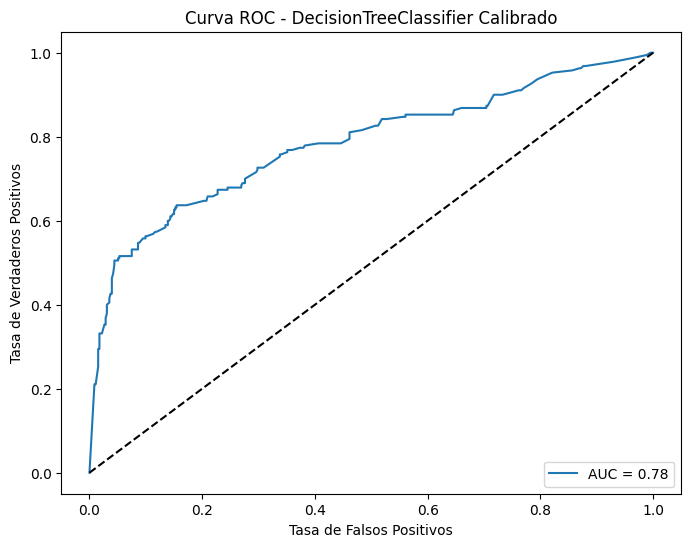

In [31]:
# Calculo de las probabilidades en el conjunto de prueba con modelo calibrado)
y1_test_prob = calibrated_model.predict_proba(x1_test)[:, 1] 

#Curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y1_test, y1_test_prob)

# AUC
auc_tree = roc_auc_score(y1_test, y1_test_prob)
print("AUC en el conjunto de prueba para el modelo DecisionTreeClassifier:", auc_tree)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'AUC = {auc_tree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - DecisionTreeClassifier Calibrado")
plt.legend(loc="lower right")
plt.show()

[Volver a Contenidos](#back)

# Conclusion<a id='conclusion'></a>

El arbol de decision sería el modelo que yo eligiría para trabajar ya que tuvo mejores resultados en cuanto a sus resultados y se supera la expectativa del objetivo el cuanto a la precision del 81.9%, la AUC con 0.78, F1-score con 0.59 y el recall de 0.47. Con estos datos estaría indicando que es el apto para identificar con mayor precision a los clientes de Megaline que deberían de estar en el plan Ultra ya que el otro modelo probado está ligeramente por arriba de un modelo decente por lo que indicaría que está dejando filtrar informacion de los clientes que podrían estar en el otro plan.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has documentado los resultados de manera clara, lo que es crucial para comunicar los hallazgos y justificar la elección del mejor modelo. Explicar el razonamiento detrás de tus decisiones es clave para asegurar que los resultados sean interpretados correctamente.

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Aylin! Tu trabajo es muy bueno.

Has completado todos los items necesarios para aprobar la entrega.

</div>